Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type


* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [13]:
#Raw data of city csv
filepath = os.path.join("raw_data/city_data.csv")
city_raw_df=pd.read_csv(filepath, low_memory="false")
city_raw_df.head()

city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban

In [14]:
#raw data of ride csv
filepath2 = os.path.join("raw_data/ride_data.csv")
ride_raw_df=pd.read_csv(filepath2, low_memory="false")
ride_raw_df.head()

city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673

In [28]:
merged = pd.merge(city_raw_df, ride_raw_df, on="city")
merged.head()


                                   
                                    

city  driver_count   type                 date   fare        ride_id
0  Kelseyland            63  Urban  2016-08-19 04:27:52   5.51  6246006544795
1  Kelseyland            63  Urban  2016-04-17 06:59:50   5.54  7466473222333
2  Kelseyland            63  Urban  2016-05-04 15:06:07  30.54  2140501382736
3  Kelseyland            63  Urban  2016-01-25 20:44:56  12.08  1896987891309
4  Kelseyland            63  Urban  2016-08-09 18:19:47  17.91  8784212854829

In [84]:
grouped_data =merged.groupby(['city','driver_count','type']).agg({'date':{'Total rides':'count'},   
                                   'fare':{'Avg fare':'mean'}})
grouped_data


/Users/Wendy/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


date       fare
                                           Total rides   Avg fare
city                 driver_count type                           
Alvarezhaven         21           Urban             31  23.928710
Alyssaberg           67           Urban             26  20.609615
Anitamouth           16           Suburban           9  37.315556
Antoniomouth         21           Urban             22  23.625000
Aprilchester         49           Urban             19  21.981579
Arnoldview           41           Urban             31  25.106452
Campbellport         26           Suburban          15  33.711333
Carrollbury          4            Suburban          10  36.606000
Carrollfort          55           Urban             29  25.395517
Clarkstad            21           Suburban          12  31.051667
Conwaymouth          18           Suburban          11  34.591818
Davidtown            73           Urban             21  22.978095
Davistown            25           Urban             25  21.497200
East Cherylfurt      9            Suburban          13  31.416154
East Douglas         12           Urban             22  26.169091
East Erin            43           Urban             28  24.478214
East Jenniferchester 22           Suburban          19  32.599474
East Leslie          9            Rural             11  33.660909
East Stephen         6            Rural             10  39.053000
East Troybury        3            Rural              7  33.244286
Edwardsbury          11           Urban             27  26.876667
Erikport             3            Rural              8  30.043750
Eriktown             15           Urban             19  25.478947
Floresberg           7            Suburban          10  32.310000
Fosterside           69           Urban             24  23.034583
Hernandezshire       10           Rural              9  32.002222
Horneland            8            Rural              4  21.482500
Jacksonfort          6            Rural              6  32.006667
Jacobfort            52           Urban             31  24.779355
Jasonfort            25           Suburban          12  27.831667
...                                                ...        ...
South Roy            35           Urban             22  26.031364
South Shannonborough 9            Suburban          15  26.516667
Spencertown          68           Urban             26  23.681154
Stevensport          6            Rural              5  31.948000
Stewartview          49           Urban             30  21.614000
Swansonbury          64           Urban             34  27.464706
Thomastown           1            Suburban          24  30.308333
Tiffanyton           21           Suburban          13  28.510000
Torresshire          70           Urban             26  24.207308
Travisville          37           Urban             23  27.220870
Vickimouth           13           Urban             15  21.474667
Webstertown          26           Suburban          16  29.721250
West Alexis          47           Urban             20  19.523000
West Brandy          12           Urban             30  24.157667
West Brittanyton     9            Urban             24  25.436250
West Dawnfurt        34           Urban             29  22.330345
West Evan            4            Suburban          12  27.013333
West Jefferyfurt     65           Urban             21  21.072857
West Kevintown       5            Rural              7  21.528571
West Oscar           11           Urban             29  24.280000
West Pamelaborough   27           Suburban          14  33.799286
West Paulport        5            Suburban          17  33.278235
West Peter           61           Urban             31  24.875484
West Sydneyhaven     70           Urban             18  22.368333
West Tony            17           Suburban          19  29.609474
Williamchester       26           Suburban          11  34.278182
Williamshire         70           Urban             31  26.990323
Wiseborough          55 

In [81]:
grouped_data

date       fare
                                           Total rides   Avg fare
city                 driver_count type                           
Alvarezhaven         21           Urban             31  23.928710
Alyssaberg           67           Urban             26  20.609615
Anitamouth           16           Suburban           9  37.315556
Antoniomouth         21           Urban             22  23.625000
Aprilchester         49           Urban             19  21.981579
Arnoldview           41           Urban             31  25.106452
Campbellport         26           Suburban          15  33.711333
Carrollbury          4            Suburban          10  36.606000
Carrollfort          55           Urban             29  25.395517
Clarkstad            21           Suburban          12  31.051667
Conwaymouth          18           Suburban          11  34.591818
Davidtown            73           Urban             21  22.978095
Davistown            25           Urban             25  21.497200
East Cherylfurt      9            Suburban          13  31.416154
East Douglas         12           Urban             22  26.169091
East Erin            43           Urban             28  24.478214
East Jenniferchester 22           Suburban          19  32.599474
East Leslie          9            Rural             11  33.660909
East Stephen         6            Rural             10  39.053000
East Troybury        3            Rural              7  33.244286
Edwardsbury          11           Urban             27  26.876667
Erikport             3            Rural              8  30.043750
Eriktown             15           Urban             19  25.478947
Floresberg           7            Suburban          10  32.310000
Fosterside           69           Urban             24  23.034583
Hernandezshire       10           Rural              9  32.002222
Horneland            8            Rural              4  21.482500
Jacksonfort          6            Rural              6  32.006667
Jacobfort            52           Urban             31  24.779355
Jasonfort            25           Suburban          12  27.831667
...                                                ...        ...
South Roy            35           Urban             22  26.031364
South Shannonborough 9            Suburban          15  26.516667
Spencertown          68           Urban             26  23.681154
Stevensport          6            Rural              5  31.948000
Stewartview          49           Urban             30  21.614000
Swansonbury          64           Urban             34  27.464706
Thomastown           1            Suburban          24  30.308333
Tiffanyton           21           Suburban          13  28.510000
Torresshire          70           Urban             26  24.207308
Travisville          37           Urban             23  27.220870
Vickimouth           13           Urban             15  21.474667
Webstertown          26           Suburban          16  29.721250
West Alexis          47           Urban             20  19.523000
West Brandy          12           Urban             30  24.157667
West Brittanyton     9            Urban             24  25.436250
West Dawnfurt        34           Urban             29  22.330345
West Evan            4            Suburban          12  27.013333
West Jefferyfurt     65           Urban             21  21.072857
West Kevintown       5            Rural              7  21.528571
West Oscar           11           Urban             29  24.280000
West Pamelaborough   27           Suburban          14  33.799286
West Paulport        5            Suburban          17  33.278235
West Peter           61           Urban             31  24.875484
West Sydneyhaven     70           Urban             18  22.368333
West Tony            17           Suburban          19  29.609474
Williamchester       26           Suburban          11  34.278182
Williamshire         70           Urban             31  26.990323
Wiseborough          55 

In [49]:
grouped_data.plot(kind="scatter", x="date", y="fare", grid=True, 
              title="Pyber Ride Sharing Data (2016)")

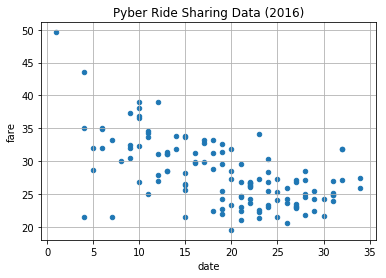

In [50]:
plt.show()



In [63]:
#x=grouped_data[["date"]]
y=grouped_data["fare"]
#s=grouped_data["driver_count"]
y
#plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)


Avg fare
city                 driver_count type               
Alvarezhaven         21           Urban     23.928710
Alyssaberg           67           Urban     20.609615
Anitamouth           16           Suburban  37.315556
Antoniomouth         21           Urban     23.625000
Aprilchester         49           Urban     21.981579
Arnoldview           41           Urban     25.106452
Campbellport         26           Suburban  33.711333
Carrollbury          4            Suburban  36.606000
Carrollfort          55           Urban     25.395517
Clarkstad            21           Suburban  31.051667
Conwaymouth          18           Suburban  34.591818
Davidtown            73           Urban     22.978095
Davistown            25           Urban     21.497200
East Cherylfurt      9            Suburban  31.416154
East Douglas         12           Urban     26.169091
East Erin            43           Urban     24.478214
East Jenniferchester 22           Suburban  32.599474
East Leslie          9            Rural     33.660909
East Stephen         6            Rural     39.053000
East Troybury        3            Rural     33.244286
Edwardsbury          11           Urban     26.876667
Erikport             3            Rural     30.043750
Eriktown             15           Urban     25.478947
Floresberg           7            Suburban  32.310000
Fosterside           69           Urban     23.034583
Hernandezshire       10           Rural     32.002222
Horneland            8            Rural     21.482500
Jacksonfort          6            Rural     32.006667
Jacobfort            52           Urban     24.779355
Jasonfort            25           Suburban  27.831667
...                                               ...
South Roy            35           Urban     26.031364
South Shannonborough 9            Suburban  26.516667
Spencertown          68           Urban     23.681154
Stevensport          6            Rural     31.948000
Stewartview          49           Urban     21.614000
Swansonbury          64           Urban     27.464706
Thomastown           1            Suburban  30.308333
Tiffanyton           21           Suburban  28.510000
Torresshire          70           Urban     24.207308
Travisville          37           Urban     27.220870
Vickimouth           13           Urban     21.474667
Webstertown          26           Suburban  29.721250
West Alexis          47           Urban     19.523000
West Brandy          12           Urban     24.157667
West Brittanyton     9            Urban     25.436250
West Dawnfurt        34           Urban     22.330345
West Evan            4            Suburban  27.013333
West Jefferyfurt     65           Urban     21.072857
West Kevintown       5            Rural     21.528571
West Oscar           11           Urban     24.280000
West Pamelaborough   27           Suburban  33.799286
West Paulport        5            Suburban  33.278235
West Peter           61           Urban     24.875484
West Sydneyhaven     70           Urban     22.368333
West Tony            17           Suburban  29.609474
Williamchester       26           Suburban  34.278182
Williamshire         70           Urban     26.990323
Wiseborough          55           Urban     22.676842
Yolandafurt          7            Urban     27.205500
Zimmermanmouth       45           Urban     28.301667

[126 rows x 1 columns]

In [ ]:
#tick marks x axis
tick_locations = np.arange(0,rides_per_city["date"].max() + 10,5)

plt.xticks(tick_locations)
plt.yticks(fare_per_city["fare"].max) + 10, 5)

In [ ]:
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Pyber Ride Sharing Data (2016)"")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Print our chart to the screen
plt.plot()
plt.show()